In [3]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append('/Volumes/slab/_Data/170422 - EonHe M018V6 with L3 etch/experiment')
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, import_data, artificial_anneal as anneal
from HeliumSurface.static_surface import *
from ipywidgets import interact

%matplotlib inline

Could not import BEM module. Please do so manually.


In [27]:
def get_f0s(fpts, mags, span=3E6):
    f0s, Qs = list(), list()

    for k in tqdm(range(np.shape(mags)[0])):
        center_freq = fpts[k, np.argmax(mags[k,:])]
        try:
            fr, ferr = kfit.fit_lor(fpts[k,:], mags[k,:]**2, 
                                    domain=(center_freq-span/2., center_freq+span/2.), 
                                    showfit=False, verbose=False)
            f0s.append(fr[2])
            Qs.append(fr[2]/(2*fr[3]))
        except:
            print("Fit failed!")
            f0s.append(np.nan)
            Qs.append(np.nan)
        
    return f0s, Qs

100%|██████████| 20/20 [00:00<00:00, 867.94it/s]

fpts
mags
phases
power
temperature
time


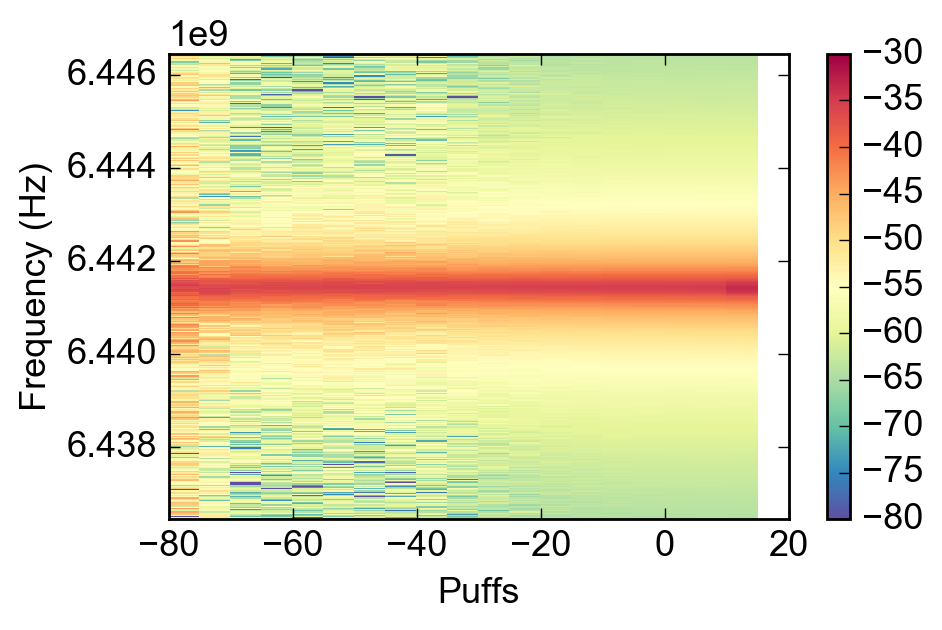

In [28]:
filepath = r"/Volumes/slab/_Data/170422 - EonHe M018V6 with L3 etch/data/170602/103307_power_sweep_full_range"
filenames = [r"103307_power_sweep_full_range.h5"]

f0s, Qs, Power = list(), list(), list()

for filename in filenames:
    with h5py.File(os.path.join(filepath, filename)) as f:
        for step in f.keys():
            print(step,)
            vars()[step] = f[step][()]
            
    fig = plt.figure(figsize=(5,3.))
    common.configure_axes(13)
    plt.pcolormesh(power, fpts[0,:], 20*np.log10(mags.T), cmap=plt.cm.Spectral_r, vmin=-80, vmax=-30)
    plt.xlabel("Puffs")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar()
    #plt.xlim(np.min(puffs), np.max(puffs))
    plt.ylim(np.min(fpts[0,:]), np.max(fpts[0,:]))

    #common.save_figure(fig, save_path=filepath)
    
    F, Q = get_f0s(fpts, mags)
    
    for x in F:
        f0s.append(x)
        
    for q in Q:
        Qs.append(q)
        
    for p in power:
        Power.append(p)

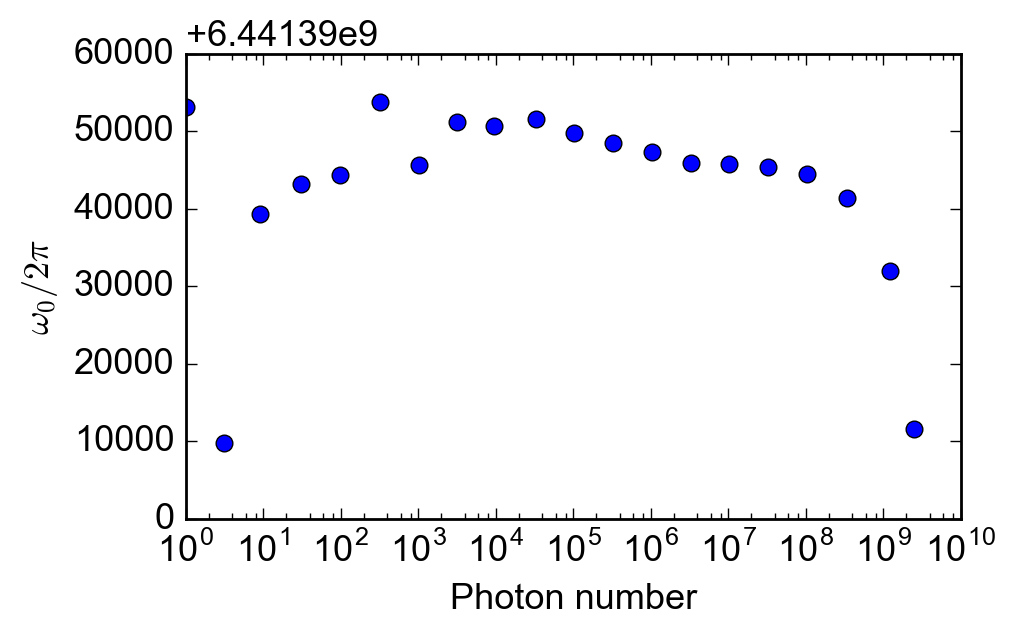

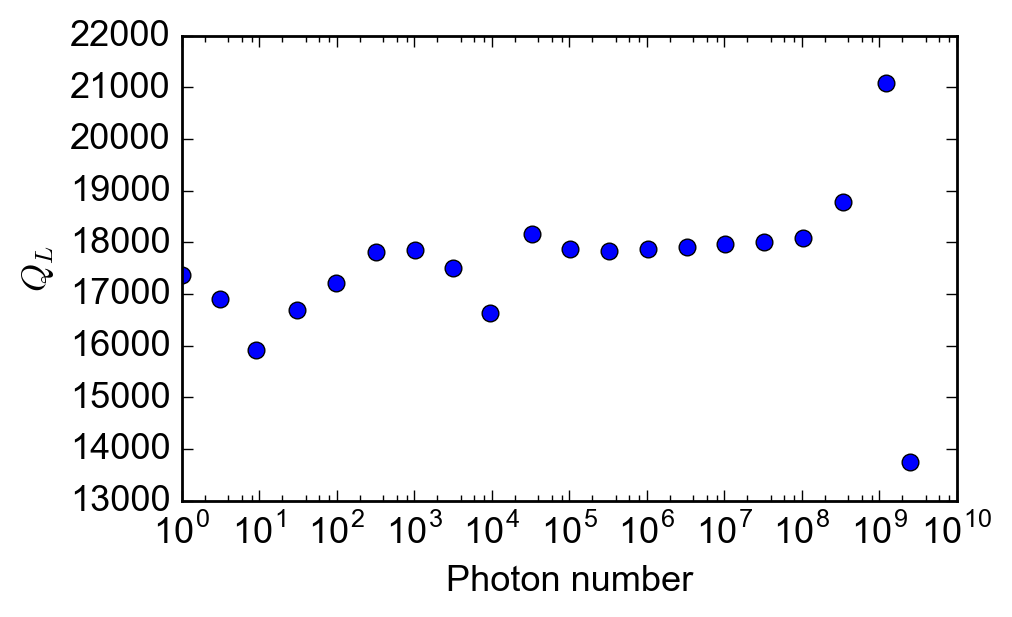

In [24]:
fig=plt.figure(figsize=(5.,3.))
plt.plot(common.get_noof_photons_in_cavity(np.array(Power)-60, np.array(f0s), np.array(Q)), f0s, 'ob')
plt.xscale('log')
plt.xlabel("Photon number")
plt.ylabel("$\omega_0/2\pi$")
#common.save_figure(fig, save_path=filepath)

fig=plt.figure(figsize=(5.,3.))
plt.plot(common.get_noof_photons_in_cavity(np.array(Power)-60, np.array(f0s), np.array(Q)), Q, 'ob')
plt.xscale('log')
plt.xlabel("Photon number")
plt.ylabel("$Q_L$")
#common.save_figure(fig, save_path=filepath)

(6436450000.0, 6446450000.0)

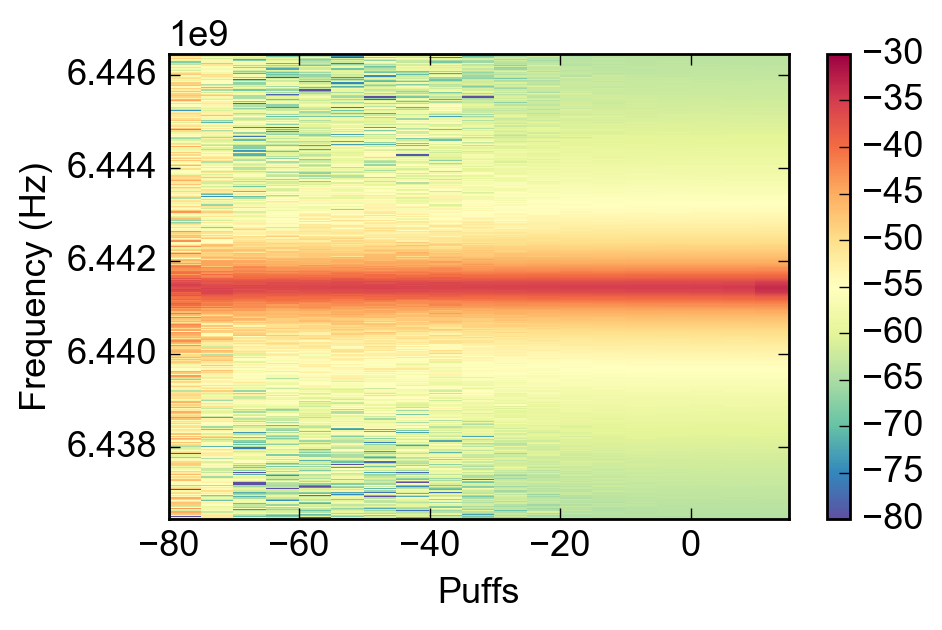

In [30]:
fig = plt.figure(figsize=(5,3.))
common.configure_axes(13)
plt.pcolormesh(power, fpts[0,:], 20*np.log10(mags.T), cmap=plt.cm.Spectral_r, vmin=-80, vmax=-30)
plt.xlabel("Puffs")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.xlim(np.min(Power), np.max(Power))
plt.ylim(np.min(fpts[0,:]), np.max(fpts[0,:]))

<IPython.core.display.Javascript object>


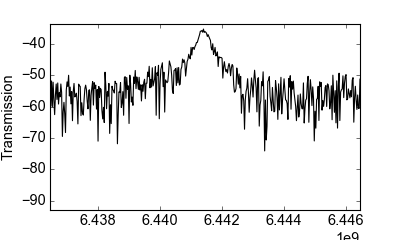

In [104]:
import matplotlib as mpl
from IPython import display
#common.configure_axes(13)
mpl.rcParams['figure.figsize'] = (5.,3.)

x_array = np.array(Power)
y_array = fpts[0,:]
z_array = 20*np.log10(mags.T)

#fig = plt.figure(figsize=(5.,3));
#plt.ion()
#line1, = plt.plot(y_array, z_array[:, 0], '-k')
#ax = plt.gca()

%matplotlib notebook

def plot_x_slice(x_coordinate=0):
    x_idx = common.find_nearest(x_array, x_coordinate)
    display.clear_output(wait=True)
    plt.clf()
    plt.plot(y_array, z_array[:, x_idx], '-k')
    # update plot
    
#     line1.set_ydata(z_array[:, x_idx])
#     line1.set_xdata(y_array)
    #plt.draw()
    display.display(plt.gcf())
    plt.ylabel("Transmission")
    plt.xlim(np.min(y_array), np.max(y_array))
    plt.ylim(np.min(z_array), np.max(z_array))        


interact(plot_x_slice, x_coordinate=(np.min(Power), np.max(Power), 1));